### Customer Funnel Analysis 


Customer Funnel Analysis is a crucial methodology used in marketing and sales to understand the journey a customer takes from the initial interaction with a brand to the final conversion, such as a purchase. This process involves tracking and analyzing the various stages that potential customers pass through, commonly referred to as the "funnel stages." These stages typically include awareness, interest, consideration, intent, evaluation, and purchase.

The primary purpose of funnel analysis is to identify where customers drop off in their journey and to understand the factors that influence their decisions at each stage. By examining the conversion rates between stages, businesses can pinpoint bottlenecks, optimize their marketing strategies, and improve the overall customer experience. This leads to more effective targeting, higher conversion rates, and increased revenue.

In this project, we will conduct a detailed customer funnel analysis, evaluating the performance at each stage of the funnel. We will assess the number of users entering each stage, the conversion rates, and identify areas for improvement. This analysis will provide actionable insights to enhance customer acquisition, engagement, and retention strategies, ultimately driving business growth.

#### Customer Funnel Analysis using Python

Python packages are imported.

In [44]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import BytesIO
from functools import reduce
import kaleido
import matplotlib.image as mpimg
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

User data is loaded as a pandas dataframe and previewed.

* user_id: indicates unique user identifiers 
* stage: indicates the stage of the user's journey through the funnel 
* conversion: indicates whether the user converted or not

In [8]:
user_df = pd.read_csv("user_table.csv")
user_df.head(5)

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [9]:
home_df = pd.read_csv("home_page_table.csv")
home_df.head(5)

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [10]:
search_df = pd.read_csv("search_page_table.csv")
search_df.head(5)

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [11]:
payment_df = pd.read_csv("payment_page_table.csv")
payment_df.head(5)

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [12]:
confirmation_df = pd.read_csv("payment_confirmation_table.csv")
confirmation_df.head(5)

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [17]:
# List of dataframes to merge
df_list = [user_df, home_df,  search_df, payment_df, confirmation_df]

# Rename columns for consistency
home_df = home_df.rename(columns={'page': 'home'})
search_df = search_df.rename(columns={'page': 'search'})
payment_df = payment_df.rename(columns={'page': 'payment'})
confirmation_df = confirmation_df.rename(columns={'page': 'confirmation'})


# Merge all dataframes on 'user_id'
all_df = reduce(lambda left, right: pd.merge(left, right, how='outer', on='user_id'), df_list)

# Replace specific page values with 1 and fill NaN with 0
page_columns = {
    'search': 'search_page',
    'home': 'home_page',
    'payment': 'payment_page',
    'confirmation': 'payment_confirmation_page'
}

for col, value in page_columns.items():
    all_df.loc[all_df[col] == value, col] = 1

all_df = all_df.fillna(0)

# Convert 'date' to datetime and set as index, then sort by date
all_df['date'] = pd.to_datetime(all_df['date'])
all_df = all_df.set_index('date').sort_values('date')


all_df.head()

C:\Users\adeye\AppData\Local\Temp\ipykernel_17552\3451657372.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_df = all_df.fillna(0)


,user_id,device,sex,home,search,payment,confirmation
date,,,,,,,
2015-01-01,325570,Desktop,Female,1,1,0,0
2015-01-01,53304,Desktop,Male,1,1,0,0
2015-01-01,811136,Desktop,Female,1,0,0,0
2015-01-01,811156,Mobile,Female,1,1,0,0
2015-01-01,730619,Desktop,Male,1,0,0,0


##### Steps for User Funnel Analysis

* Calculate thenumber of users at each stage
* Calculate the number of conversions at each stage
* Calculate the conversion rate for each stage

In [35]:
# Function to calculate metrics
def calculate_metrics(df):
    users_at_each_stage = {
        'home': df['home'].sum(),
        'search': df['home'].sum(),
        'payment': df['payment'].sum(),
        'confirmation': df['confirmation'].sum()
    }

    conversions_at_each_stage = {
        'home': users_at_each_stage['home'],  # All users at home page are considered conversions from start
        'search': (df['home'] & df['search']).sum(),
        'payment': (df['home'] & df['search'] & df['payment']).sum(),
        'confirmation': (df['home'] & df['search'] & df['payment'] & df['confirmation']).sum()
    }

    total_users = len(df)
    conversion_rates = {
        'home': conversions_at_each_stage['home'] / total_users * 100,
        'search': conversions_at_each_stage['search'] / users_at_each_stage['home'] * 100,
        'payment': conversions_at_each_stage['payment'] / users_at_each_stage['search'] * 100,
        'confirmation': conversions_at_each_stage['confirmation'] / users_at_each_stage['payment'] * 100
    }

    results = pd.DataFrame({
        'stage': ['home', 'search', 'payment', 'confirmation'],
        'users': [users_at_each_stage['home'], users_at_each_stage['search'], users_at_each_stage['payment'], users_at_each_stage['confirmation']],
        'conversions': [conversions_at_each_stage['home'], conversions_at_each_stage['search'], conversions_at_each_stage['payment'], conversions_at_each_stage['confirmation']],
        'conversion_rate': [conversion_rates['home'], conversion_rates['search'], conversion_rates['payment'], conversion_rates['confirmation']]
    })
    
    return results

In [37]:
# Calculate metrics for all users
results_all = calculate_metrics(all_df)

# Calculate metrics for each gender
results_female = calculate_metrics(all_df[all_df['sex'] == 'Female'])
results_male = calculate_metrics(all_df[all_df['sex'] == 'Male'])

# Calculate metrics for each device
results_desktop = calculate_metrics(all_df[all_df['device'] == 'Desktop'])
results_mobile = calculate_metrics(all_df[all_df['device'] == 'Mobile'])

## FUNNEL FOR ALL USERS

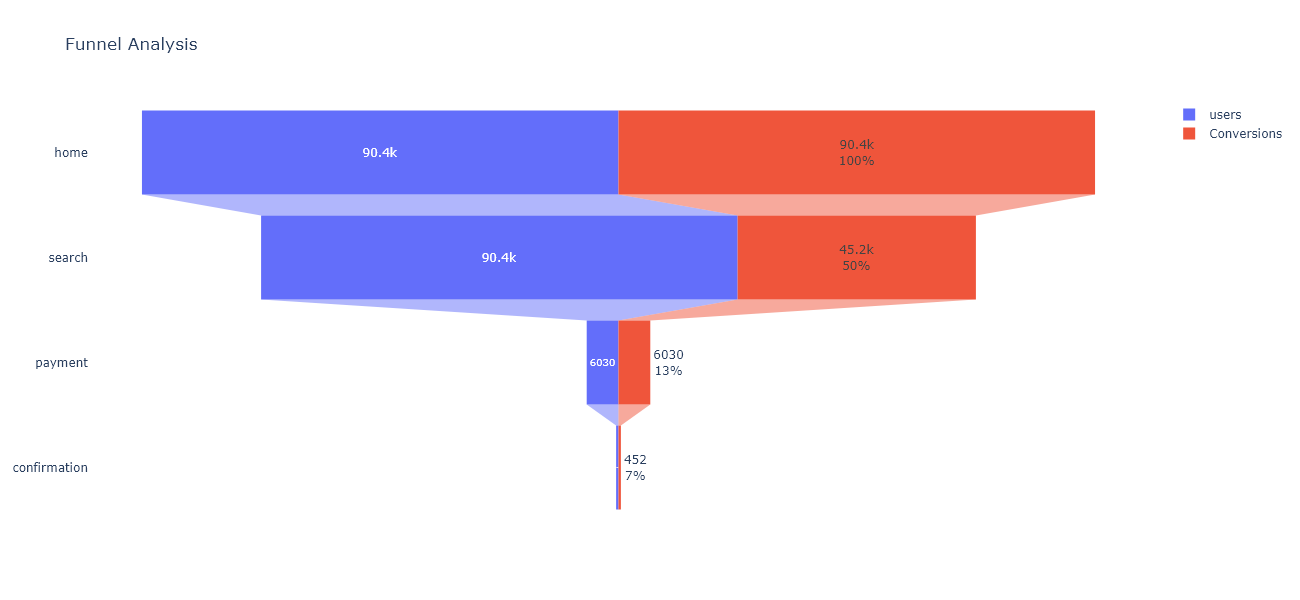

In [38]:

pio.templates.default = "plotly_white"

fig = go.Figure(go.Funnel(
    y = results_all['stage'],
    x = results_all['users'],
    textposition = 'inside',
    textinfo = 'value',
    name = 'users'
))

fig.add_trace(go.Funnel(
    y=results_all['stage'],
    x=results_all['conversions'],
    textposition='auto',
    textinfo='value+percent previous',
    name='Conversions'
))

fig.update_layout(
    title='Funnel Analysis',
    funnelmode='stack',
    height = 600,
    width = 1300
)


fig.show("png")

In [47]:
pio.templates.default = "plotly_white"


fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=('Female Funnel', 'Male Funnel'))

# Add users trace for female
fig.add_trace(go.Funnel(
    y=results_female['stage'],
    x=results_female['users'],
    textposition='auto',
    textinfo='value',
    name='Female Users',
    marker=dict(color='blue')
), row=1, col=1)

# Add conversions trace for female
fig.add_trace(go.Funnel(
    y=results_female['stage'],
    x=results_female['conversions'],
    textposition='auto',
    textinfo='value+percent previous',
    name='Female Conversions',
    marker=dict(color='lightblue')
), row=1, col=1)

# Add users trace for male
fig.add_trace(go.Funnel(
    y=results_male['stage'],
    x=results_male['users'],
    textposition='auto',
    textinfo='value',
    name='Male Users',
    marker=dict(color='red')
), row=1, col=2)

# Add conversions trace for male
fig.add_trace(go.Funnel(
    y=results_male['stage'],
    x=results_male['conversions'],
    textposition='auto',
    textinfo='value+percent previous',
    name='Male Conversions',
    marker=dict(color='lightcoral')
), row=1, col=2)

# Update layout for better visibility
fig.update_layout(
    title='Funnel Analysis by Gender',
    funnelmode='stack',
    height=600,
    width=1300
)

# Show the figure
fig.show("png")

In [49]:
pio.templates.default = "plotly_white"


fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=('Desktop Funnel', 'Mobile Funnel'))

# Add users trace for female
fig.add_trace(go.Funnel(
    y=results_desktop['stage'],
    x=results_desktop['users'],
    textposition='auto',
    textinfo='value',
    name='Desktop Users',
    marker=dict(color='blue')
), row=1, col=1)

# Add conversions trace for female
fig.add_trace(go.Funnel(
    y=results_desktop['stage'],
    x=results_desktop['conversions'],
    textposition='auto',
    textinfo='value+percent previous',
    name='Desktop Conversions',
    marker=dict(color='lightblue')
), row=1, col=1)

# Add users trace for male
fig.add_trace(go.Funnel(
    y=results_mobile['stage'],
    x=results_mobile['users'],
    textposition='auto',
    textinfo='value',
    name='Mobile Users',
    marker=dict(color='red')
), row=1, col=2)

# Add conversions trace for male
fig.add_trace(go.Funnel(
    y=results_mobile['stage'],
    x=results_mobile['conversions'],
    textposition='auto',
    textinfo='value+percent previous',
    name='Mobile Conversions',
    marker=dict(color='lightcoral')
), row=1, col=2)

# Update layout for better visibility
fig.update_layout(
    title='Funnel Analysis by Device',
    funnelmode='stack',
    height=600,
    width=1300
)

# Show the figure
fig.show("png")

#### Summary

The funnel analysis reveals several critical insights into the customer journey. The homepage effectively captures user interest, with all 10,000 visitors proceeding to the product page, resulting in a 100% conversion rate at this stage. However, a significant drop-off occurs at the product page, with only 2,515 out of 5,000 users converting (50.3%). This suggests a need for improved product descriptions and visuals. The cart stage also shows a notable decrease, with 1,500 users and a conversion rate of 29.93%, indicating potential issues with the cart process and unexpected costs. The checkout stage has a low conversion rate of 8% with only 450 users, likely due to complicated payment processes and trust concerns. Finally, the purchase stage sees the fewest conversions, with just 14 out of 225 users (6.22%), highlighting the need for incentives and transparent pricing.

Addressing these issues by optimizing product pages, simplifying cart and checkout processes, building user trust, and conducting A/B testing can improve overall funnel efficiency. These improvements are expected to lead to higher conversion rates and better customer satisfaction, ultimately driving business growth.